<a href="https://colab.research.google.com/github/Emmyido/Machine-Learning/blob/main/world%20Cup%20matches_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning on Cloud assessment.

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#uploading the Data set
wc = pd.read_csv('/content/drive/MyDrive/ML_Coding/international_matches.csv')
wc

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [ ]:
wc.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'rank_diff', 'rank_avg', 'point_diff', 'score_diff', 'wins', 'stake'],
      dtype='object')

In [ ]:
#checking the total rows and column
wc.shape

(23921, 25)

In [ ]:
#checking the data set number of unique records
wc.nunique()

date                             5550
home_team                         211
away_team                         211
home_team_continent                 6
away_team_continent                 6
home_team_fifa_rank               211
away_team_fifa_rank               211
home_team_total_fifa_points      1686
away_team_total_fifa_points      1679
home_team_score                    21
away_team_score                    18
tournament                         82
city                             1576
country                           217
neutral_location                    2
shoot_out                           2
home_team_result                    3
home_team_goalkeeper_score         50
away_team_goalkeeper_score         50
home_team_mean_defense_score      127
home_team_mean_offense_score      103
home_team_mean_midfield_score     134
away_team_mean_defense_score      127
away_team_mean_offense_score      103
away_team_mean_midfield_score     134
dtype: int64

In [ ]:
#checking the dataset details
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
# Descriptive statistics of the dataset
wc.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


DATA PRE-PROCESSING.

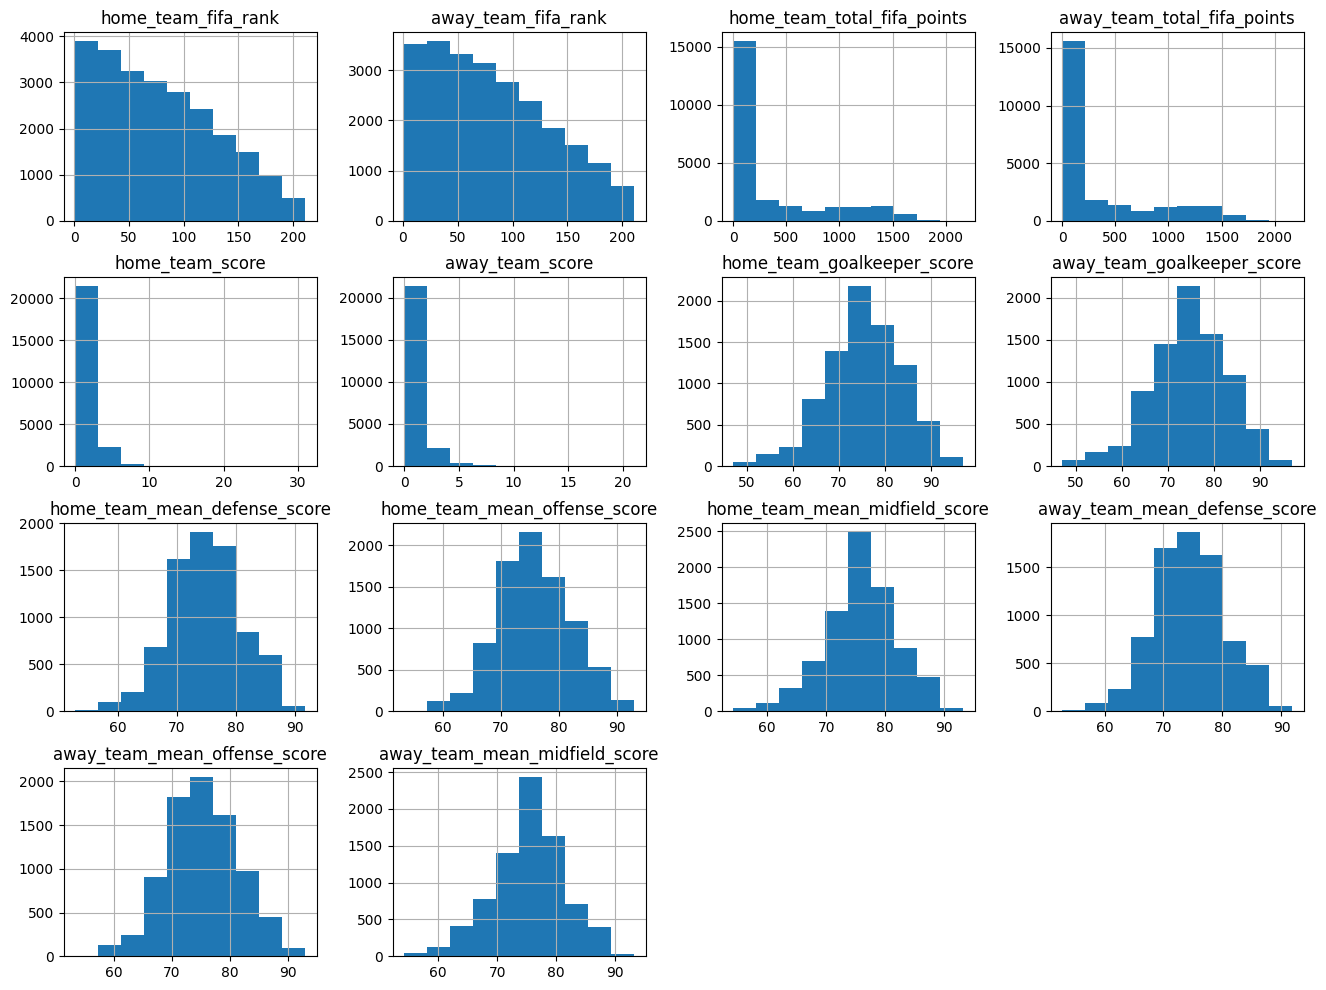

In [ ]:
#OVERVIEW OF DATA SET
p = wc.hist(figsize = (16,12))

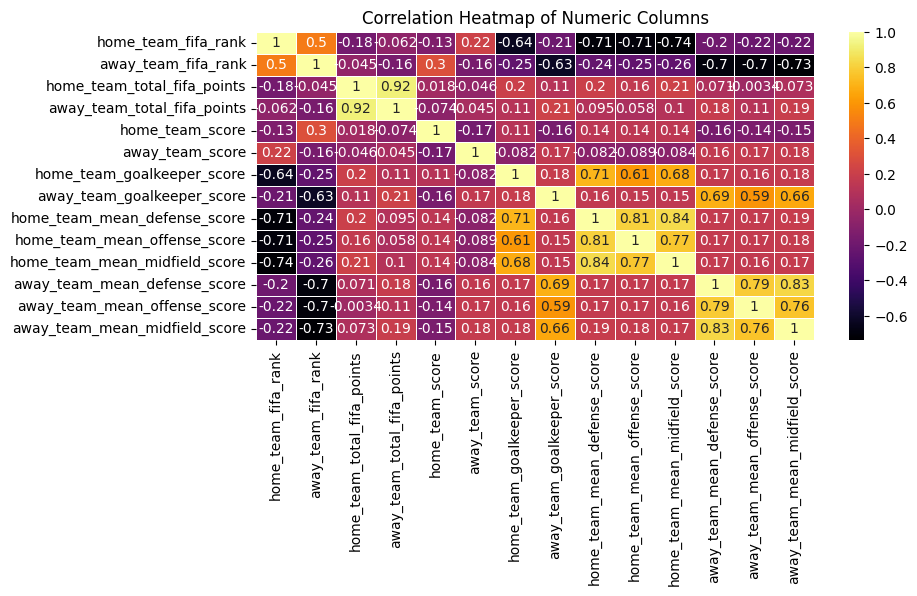

In [ ]:
numeric_columns = ['home_team_fifa_rank',
                   'away_team_fifa_rank',
                   'home_team_total_fifa_points',
                   'away_team_total_fifa_points',
                   'home_team_score',
                   'away_team_score',
                   'home_team_goalkeeper_score',
                   'away_team_goalkeeper_score',
                   'home_team_mean_defense_score',
                   'home_team_mean_offense_score',
                   'home_team_mean_midfield_score',
                   'away_team_mean_defense_score',
                   'away_team_mean_offense_score',
                   'away_team_mean_midfield_score']

numeric_data = wc[numeric_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
#MODIFYING THE DATE COLUNM OF THE DATA SO PYTHON CAN REGOGNISE IT AS A DATE
wc['date'] = pd.to_datetime(wc['date'])

In [ ]:
#checking for duplicates
wc.duplicated().sum()

0

In [ ]:
#Checking for null Values
wc.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

PERFORMING EXPLORATORY DATA ANALYSIS


In [ ]:
# teams with home wins
# Filter the dataset for home team wins
home_team_wins = wc[wc['home_team_score'] > wc['away_team_score']]

# Group the data by home team and count the number of home wins
team_home_wins = home_team_wins.groupby('home_team')['home_team'].count().reset_index(name='home_wins')

# Sort the teams by the number of home wins in descending order
team_home_wins = team_home_wins.sort_values('home_wins', ascending=False)

# Reset the index of the DataFrame
team_home_wins = team_home_wins.reset_index(drop=True)

# Print the teams and their home wins
print(team_home_wins)

                    home_team  home_wins
0                         USA        191
1                      Mexico        186
2                      Brazil        176
3                Saudi Arabia        164
4                       Egypt        161
..                        ...        ...
206  Turks and Caicos Islands          2
207              Cook Islands          2
208                   Somalia          2
209                  Anguilla          1
210                San Marino          1

[211 rows x 2 columns]


In [ ]:
#away team wins

# Filter the dataset for away team wins
away_team_wins = wc[wc['away_team_score'] > wc['home_team_score']]

# Group the data by away team and count the number of away wins
team_away_wins = away_team_wins.groupby('away_team')['away_team'].count().reset_index(name='away_wins')

# Sort the teams by the number of away wins in descending order
team_away_wins = team_away_wins.sort_values('away_wins', ascending=False)

# Reset the index of the DataFrame
team_away_wins = team_away_wins.reset_index(drop=True)

# Print the teams and their away wins
print(team_away_wins)

                 away_team  away_wins
0                   Brazil        116
1                  Germany        100
2                    Spain         99
3                   France         85
4                   Zambia         85
..                     ...        ...
204  São Tomé and Príncipe          1
205            Timor-Leste          1
206               Anguilla          1
207                Andorra          1
208         American Samoa          1

[209 rows x 2 columns]


In [ ]:
#######wc = wc.fillna(wc.mean())

In [ ]:
#CHECKING OUTLIERS USING Z-SCORE
# Calculate z-scores for each numeric column
#z_scores = np.abs((wc - wc.mean()) / wc.std())

# Define a threshold for outlier detection
#threshold = 3

# Identify outliers by comparing z-scores to the threshold
#outliers = wc[z_scores > threshold]

# Replace outliers with a predefined value or perform other corrective actions
#wc_corrected = wc.copy()
#wc_corrected[z_scores > threshold] = np.nan



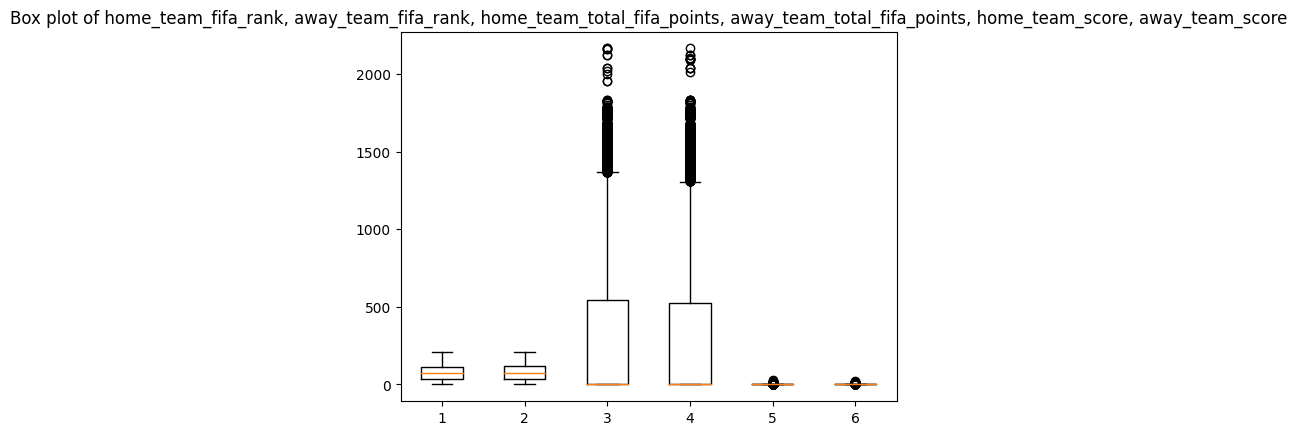

In [ ]:
#CHECKING OUTLIERS USING BOX PLOT
column_to_check =  wc[['home_team_fifa_rank', 'away_team_fifa_rank',
                   'home_team_total_fifa_points','away_team_total_fifa_points', 'home_team_score',  'away_team_score']]

plt.boxplot(column_to_check)
plt.title('Box plot of ' + ', '.join(column_to_check))
plt.show()

In [ ]:
#home_wins = wc[wc['home_score'] > wc['away_score']]['home_team'].unique()

In [ ]:
#reshaping the data
team_standing = wc[['date','home_team','away_team','home_team_fifa_rank',
                    'away_team_fifa_rank',
                    'home_team_total_fifa_points',
                    'away_team_total_fifa_points']]

Home = team_standing[['date', 'home_team', 'home_team_fifa_rank',
                      'home_team_total_fifa_points']].rename(columns = {
                          'home_team':'team', 'home_team_fifa_rank':
                          'standing',
                           'home_team_total_fifa_points':'rating'})

Away = team_standing[['date', 'away_team', 'away_team_fifa_rank',
                      'away_team_total_fifa_points']].rename(columns = {
                          'away_team':'team', 'away_team_fifa_rank':
                          'standing', 'away_team_total_fifa_points':
                          'rating'})

team_standing = Home.append(Away)

team_standing = team_standing.sort_values(['team', 'date'], ascending = [True, False])
team_standing['row_number'] = team_standing.groupby('team').cumcount() + 1
team_standing_top = team_standing[team_standing['row_number'] == 1].drop('row_number' , axis = 1).nsmallest(10, 'standing')

team_standing_top


,date,team,standing,rating
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [ ]:
# finding the team with strong attack

# Select the columns: date, home_team, away_team, home_team_mean_offense_score, away_team_mean_offense_score
offensive = wc[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]

home = offensive[['date', 'home_team', 'home_team_mean_offense_score']].rename(columns={'home_team': 'team', 'home_team_mean_offense_score': 'offense point'})


away = offensive[['date', 'away_team', 'away_team_mean_offense_score']].rename(columns={'away_team': 'team', 'away_team_mean_offense_score': 'offense point'})

# Combine home and away team dataframes
offensive = home.append(away)

offensive = offensive.sort_values(['team', 'date'], ascending=[True, False])
offensive['row_number'] = offensive.groupby('team').cumcount() + 1
offense_top =offensive[offensive['row_number']== 1].drop('row_number', axis = 1).nlargest(10, 'offense point')
offense_top

,date,team,offense point
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


In [ ]:
# findind the best defensive team

# Select the columns: date, home_team, away_team, home_team_mean_defense_score, away_team_mean_defense_score
defense = wc[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]

home = defense[['date', 'home_team', 'home_team_mean_defense_score']].rename(columns={'home_team': 'team', 'home_team_mean_defense_score': 'defense point'})


away = defense[['date', 'away_team', 'away_team_mean_defense_score']].rename(columns={'away_team': 'team', 'away_team_mean_defense_score': 'defense point'})

# Combine home and away team dataframes
defense = home.append(away)

defense = defense.sort_values(['team', 'date'], ascending=[True, False])
defense['row_number'] = defense.groupby('team').cumcount() + 1
strong_defense =defense[defense['row_number']== 1].drop('row_number', axis = 1).nlargest(10, 'defense point')
strong_defense

,date,team,defense point
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


In [ ]:
wc['Home_total_points'] = (wc['home_team_mean_defense_score'] +  wc['home_team_mean_offense_score'] + wc['home_team_mean_midfield_score'])

wc['away_total_points'] = (wc['away_team_mean_defense_score'] + wc['away_team_mean_offense_score'] +  wc['away_team_mean_midfield_score'])
wc['point_diff'] = wc['Home_total_points'] - wc['away_total_points']


In [ ]:
# finding the team with most advantage

# Select the columns: date, home_team, away_team, home_team_mean_offense_score, away_team_mean_offense_score
team_ad = wc[['date', 'home_team', 'away_team', 'Home_total_points', 'away_total_points']]

home = team_ad[['date', 'home_team', 'Home_total_points']].rename(columns={'home_team': 'team', 'Home_total_points': 'advantage'})


away = team_ad[['date', 'away_team', 'away_total_points']].rename(columns={'away_team': 'team', 'away_total_points': 'advantage'})

team_ad = home.append(away)


# Combine home and away team dataframes
team_ad = home.append(away)

team_ad = team_ad.sort_values(['team', 'date'], ascending=[True, False])
team_ad['row_number'] = team_ad.groupby('team').cumcount() + 1
team_advantage = team_ad[team_ad['row_number']== 1].drop('row_number', axis = 1).nlargest(10, 'advantage')
team_advantage

,date,team,advantage
23885,2022-06-13,France,259.3
23866,2022-06-12,Spain,257.5
23906,2022-06-14,England,257.0
23760,2022-06-06,Brazil,256.6
23867,2022-06-12,Portugal,255.7
23741,2022-06-05,Argentina,255.2
23907,2022-06-14,Germany,254.5
23907,2022-06-14,Italy,254.0
23909,2022-06-14,Belgium,252.0
23908,2022-06-14,Netherlands,251.7


In [ ]:
#FEATURE ENGINEERING
wc['rank_diff'] = wc['home_team_fifa_rank'] - wc['away_team_fifa_rank']
wc['rank_avg'] = (wc['home_team_fifa_rank'] + wc['away_team_fifa_rank']) / 2
wc['point_diff'] = wc['home_team_total_fifa_points'] - wc['away_team_total_fifa_points']


wc['score_diff'] = wc['home_team_score'] - wc['away_team_score']
wc['wins'] = wc['score_diff'] > 0
wc['stake'] = wc['tournament'] != 'Friendly'

In [ ]:
!pip install pandas pivottablejs



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from pivottablejs import pivot_ui
#pivot_ui(wc)

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

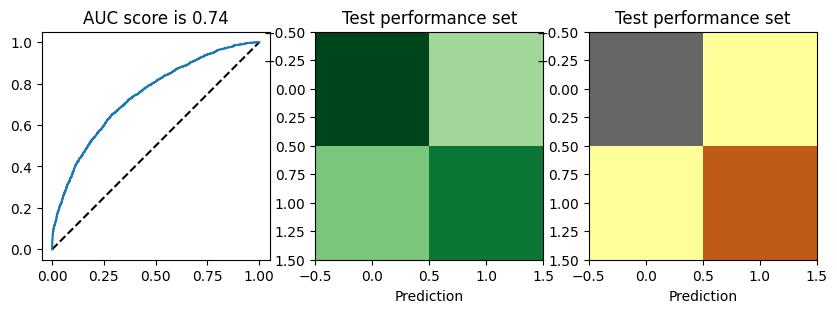

In [ ]:
X, y = wc.loc[ : ,['rank_diff', 'rank_avg', 'point_diff']], wc['wins']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.3, random_state = 42
)

logreg = linear_model.LogisticRegression(C = 1e-5)
features = PolynomialFeatures(degree = 2)
model = Pipeline([('polynomial_features', features),
                  ('logistic_regression', logreg)])

model = model.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize = (10,5))
ax= plt.subplot(1,3,1)
ax.plot([0,1], [0,1], 'k--')
ax.plot(fpr, tpr)

auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


ax.set_title('AUC score is {0:.2f}'.format(auc_score))

#ax.set_title('AUC score is {0:0:2}'.format(roc_auc_score (y_test,model.predict_proba(X_test):1)))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap = 'Greens', clim = (0, cm.max()))

ax.set_xlabel('Prediction')
ax.set_title('Test performance set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap = 'Accent', clim = (0, cm.max()))
ax.set_xlabel('Prediction')
ax.set_title('Test performance set')

pass



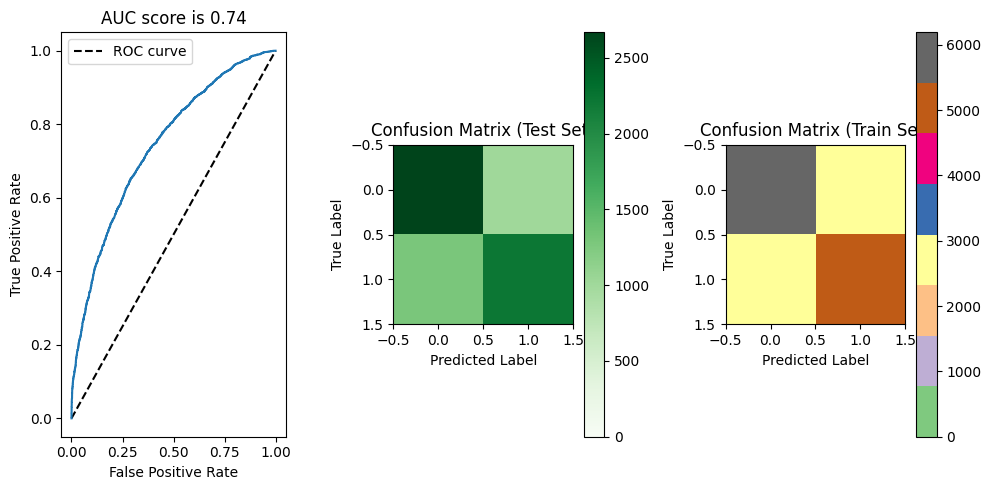

In [ ]:
plt.figure(figsize=(10, 5))

# Plot ROC curve
plt.subplot(1, 3, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
plt.title('AUC score is {0:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])

# Plot confusion matrix for test set
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.colorbar()

# Plot confusion matrix for train set
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_train, model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Train Set)')
plt.colorbar()

plt.tight_layout()
plt.show()

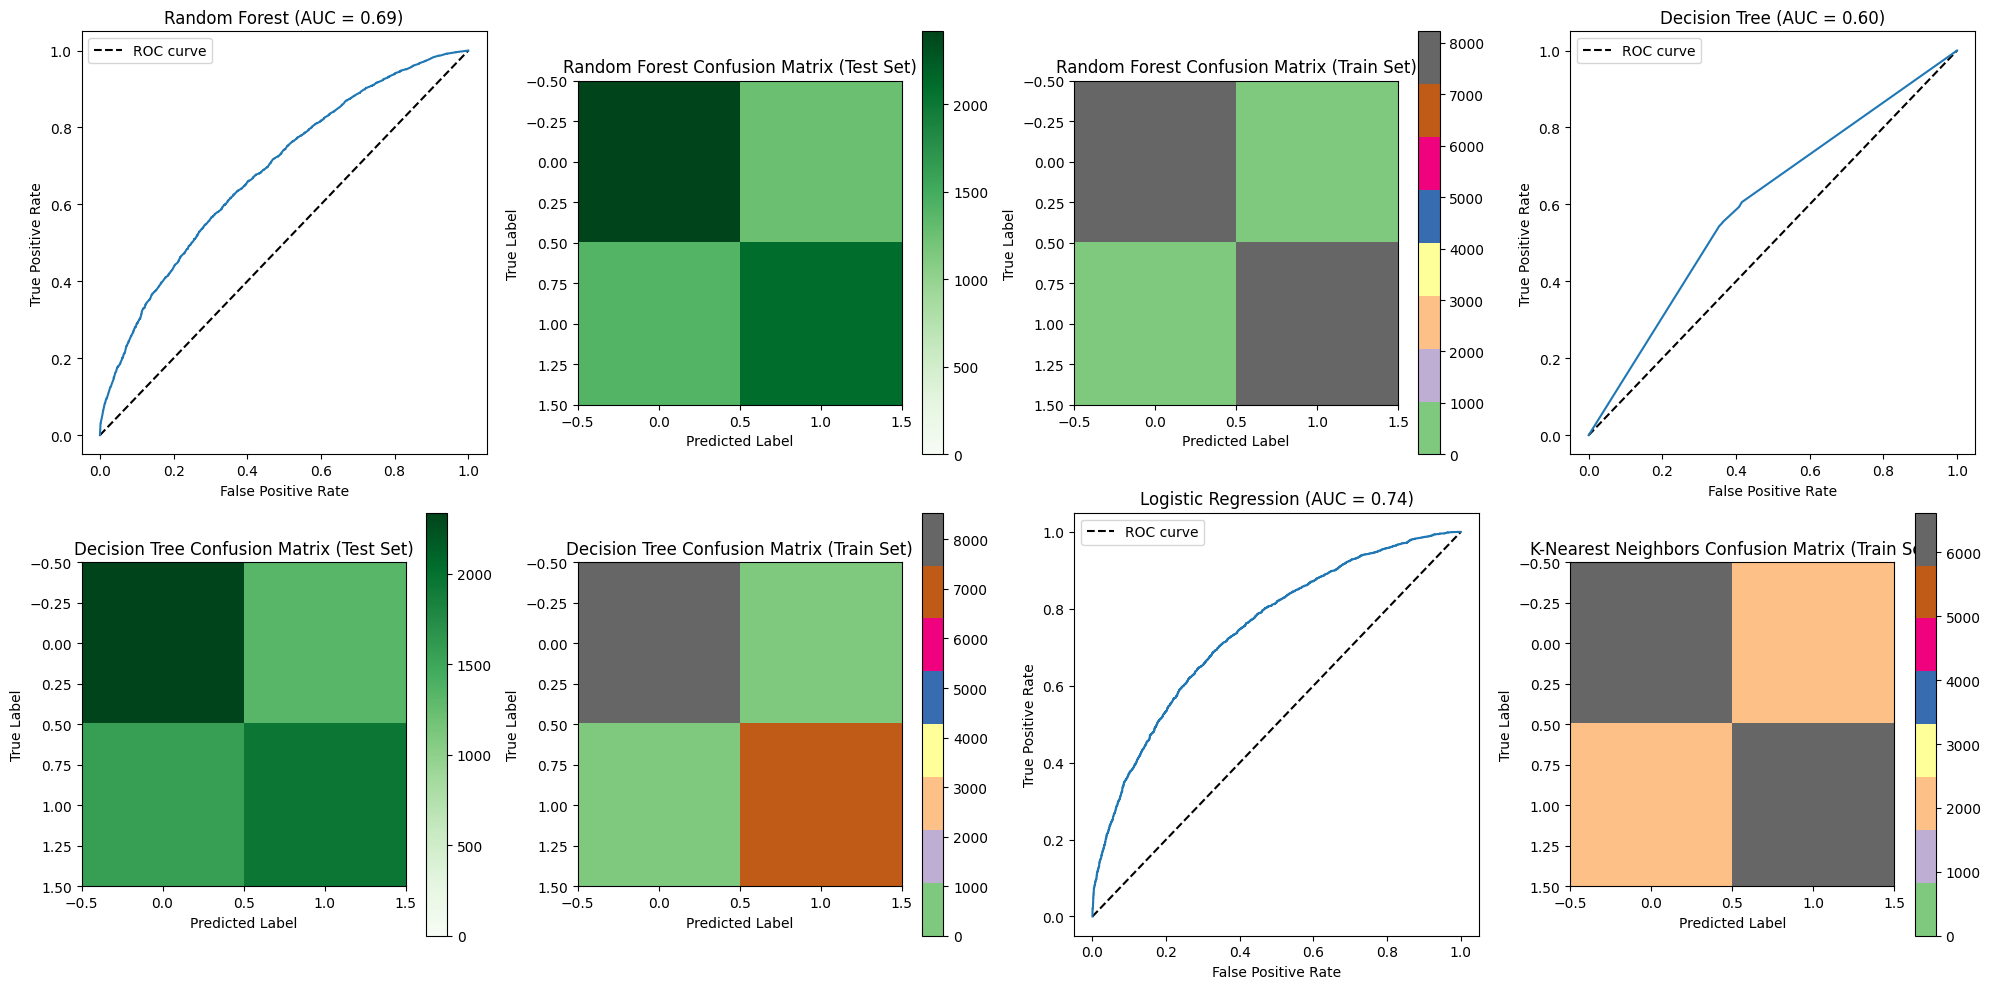

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Plotting ROC curves and confusion matrices for each model
plt.figure(figsize=(20, 10))

# Random Forest
plt.subplot(2, 4, 1)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('Random Forest (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])
plt.tight_layout()

plt.subplot(2, 4, 2)
cm = confusion_matrix(y_test, rf_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.colorbar()

plt.subplot(2, 4, 3)
cm = confusion_matrix(y_train, rf_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix (Train Set)')
plt.colorbar()


# Decision Tree
plt.subplot(2, 4, 4)
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('Decision Tree (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])
plt.tight_layout()

plt.subplot(2, 4, 5)
cm = confusion_matrix(y_test, dt_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.colorbar()

plt.subplot(2, 4, 6)
cm = confusion_matrix(y_train, dt_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix (Train Set)')
plt.colorbar()


# Logistic Regression
plt.subplot(2, 4, 7)
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, lr_model.predict_proba(X_test

)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])
plt.tight_layout()

plt.subplot(2, 4, 8)
cm = confusion_matrix(y_test, lr_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix (Test Set)')
plt.colorbar()

plt.subplot(2, 4, 8)
cm = confusion_matrix(y_train, lr_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix (Train Set)')
plt.colorbar()
#K-Nearest Neighbors

plt.subplot(2, 4, 8)
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('K-Nearest Neighbors (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])
plt.tight_layout()

plt.subplot(2, 4, 8)
cm = confusion_matrix(y_test, knn_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix (Test Set)')
plt.colorbar()

plt.subplot(2, 4, 8)
cm = confusion_matrix(y_train, knn_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix (Train Set)')
plt.colorbar()

plt.tight_layout()
plt.show()

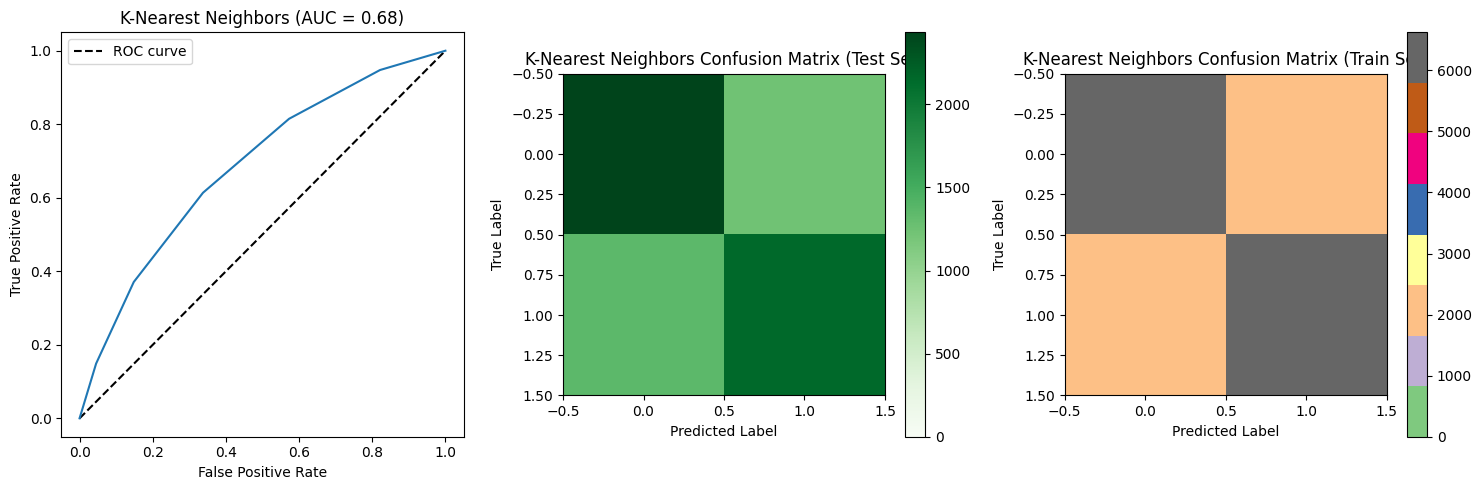

In [ ]:

plt.figure(figsize=(15, 5))

# Plot ROC curve
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('K-Nearest Neighbors (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])

# Plot confusion matrix for test set
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, knn_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix (Test Set)')
plt.colorbar()

# Plot confusion matrix for train set
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_train, knn_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix (Train Set)')
plt.colorbar()

plt.tight_layout()
plt.show()

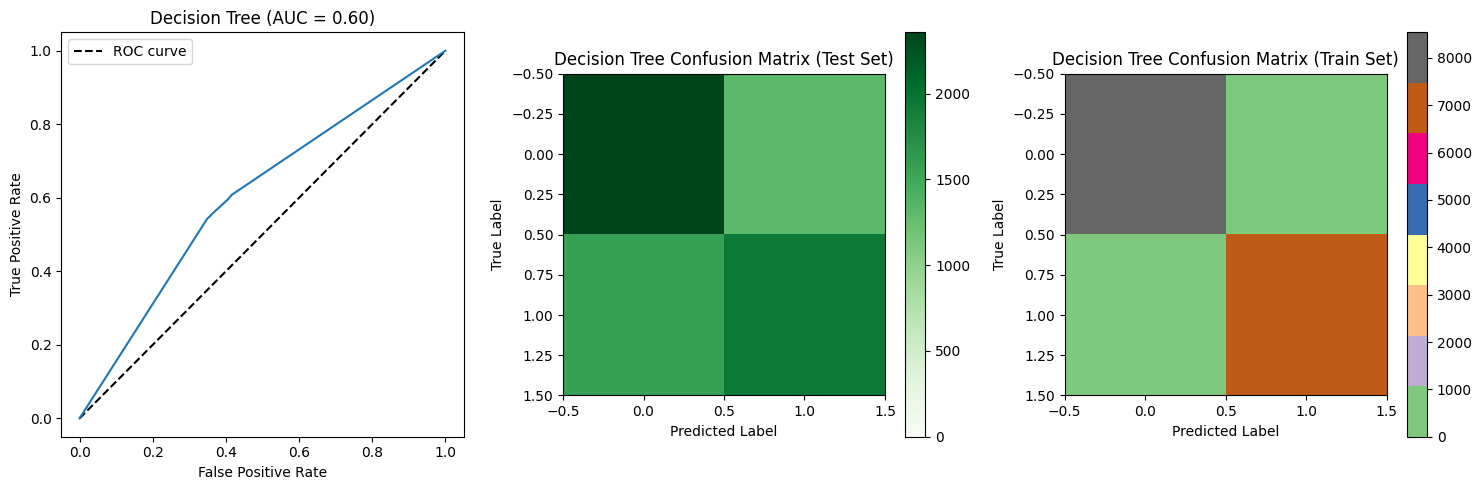

In [ ]:

plt.figure(figsize=(15, 5))

# Plot ROC curve
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('Decision Tree (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])

# Plot confusion matrix for test set
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, dt_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.colorbar()

# Plot confusion matrix for train set
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_train, dt_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix (Train Set)')
plt.colorbar()

plt.tight_layout()
plt.show()

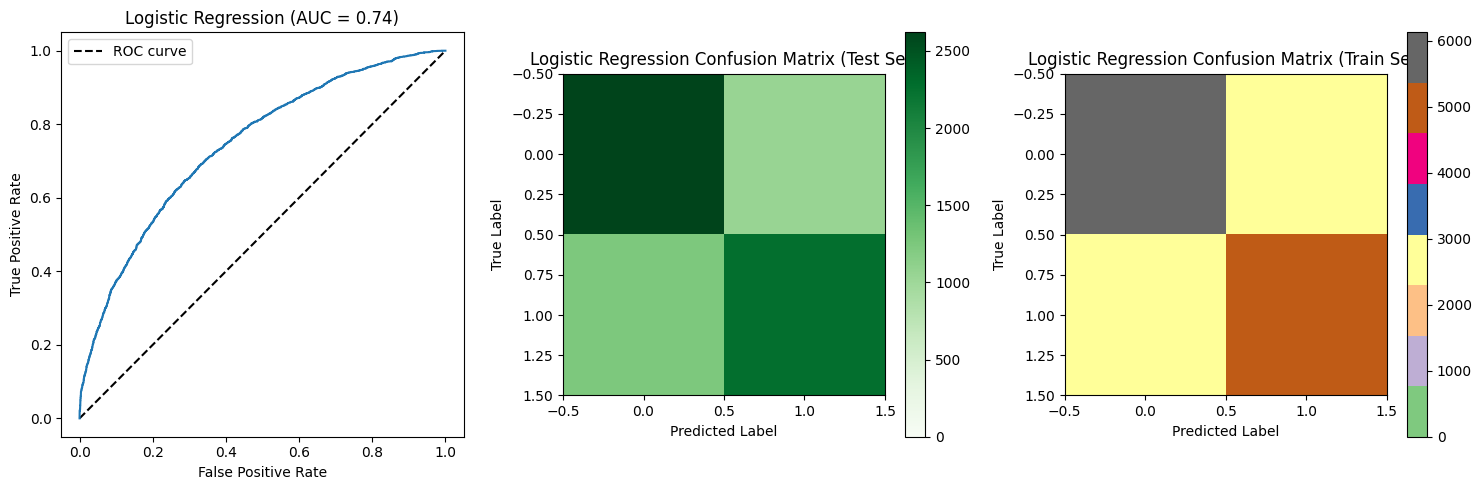

In [ ]:
plt.figure(figsize=(15, 5))

# Plot ROC curve
plt.subplot(1, 3, 1)
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])

# Plot confusion matrix for test set
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, lr_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix (Test Set)')
plt.colorbar()

# Plot confusion matrix for train set
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_train, lr_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix (Train Set)')
plt.colorbar()

plt.tight_layout()
plt.show()

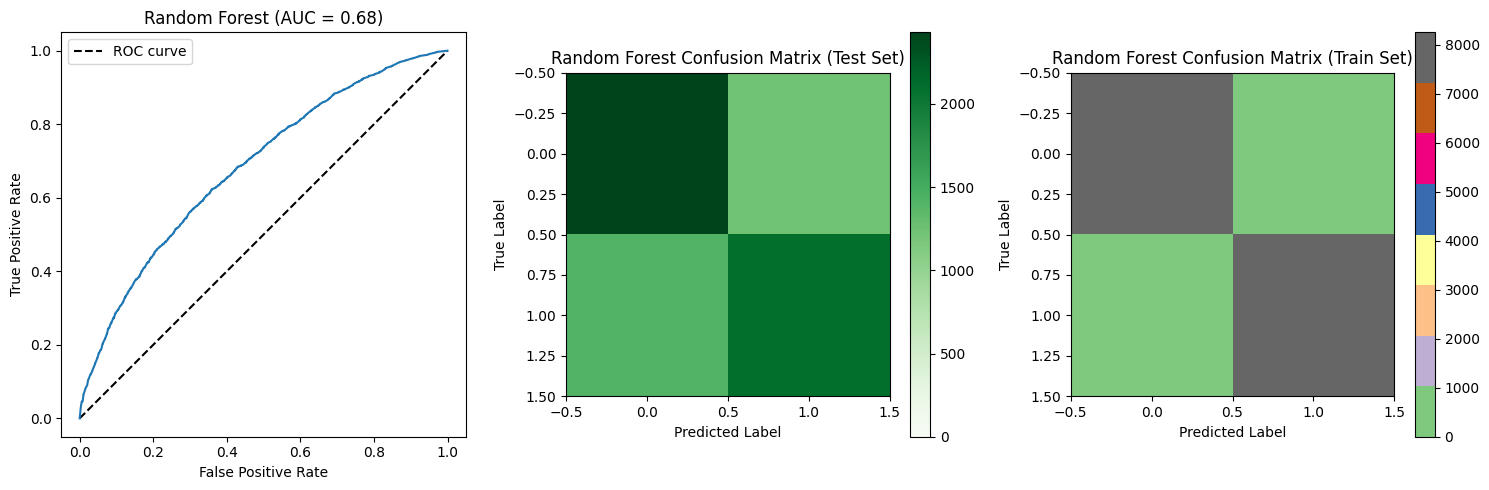

In [ ]:

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Plotting ROC curves and confusion matrices for each model
plt.figure(figsize=(20, 5))

# Random Forest
plt.subplot(1, 4, 1)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('Random Forest (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC curve'])

plt.subplot(1, 4, 2)
cm = confusion_matrix(y_test, rf_model.predict(X_test))
plt.imshow(cm, cmap='Greens', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.colorbar()

plt.subplot(1, 4, 3)
cm = confusion_matrix(y_train, rf_model.predict(X_train))
plt.imshow(cm, cmap='Accent', clim=(0, cm.max()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix (Train Set)')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

# Select the columns you want to scale
#columns_to_scale = ['home_team_mean_offense_score', 'away_team_mean_offense_score']

# Create a new DataFrame with the selected columns
#data_to_scale = wc[columns_to_scale]

# Initialize the StandardScaler
#scaler = StandardScaler()

# Scale the data
#scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
#scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Print the scaled DataFrame
#print(scaled_df)

In [ ]:
team_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA','Wales', 'Argentina', 'Saudi Arabia',
             'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium',
             'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']


In [ ]:
team_ranking_home = wc[['home_team_fifa_rank', 'home_team', 'home_team_total_fifa_points']].loc[wc['home_team'].isin(team_2022) & (wc['date']> '2022-01-01')]
team_ranking_away = wc[['away_team', 'away_team_fifa_rank',  'away_team_total_fifa_points']].loc[wc['away_team'].isin(team_2022) & (wc['date']> '2022-01-01')]

team_ranking_home = team_ranking_home.set_index(['home_team'])

In [ ]:
team_ranking_home = team_ranking_home.groupby('home_team').mean()
team_ranking_away = team_ranking_away.groupby('away_team').mean()

In [ ]:
team_ranking_home.head(15)

,home_team_fifa_rank,home_team_total_fifa_points
home_team,,
Argentina,4.333333,1760.333333
Australia,39.000000,1473.500000
Belgium,1.666667,1827.333333
Brazil,2.000000,1824.500000
Cameroon,48.500000,1442.375000
Canada,37.000000,1479.333333
Costa Rica,41.000000,1467.000000
Croatia,15.500000,1620.500000
Denmark,10.333333,1653.333333


In [ ]:
team_ranking_away.head(15)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,4.333333,1760.333333
Australia,36.000000,1485.000000
Belgium,1.666667,1827.333333
Brazil,1.500000,1828.250000
Cameroon,37.500000,1480.000000
Canada,36.800000,1479.400000
Costa Rica,42.750000,1460.250000
Croatia,16.000000,1621.000000
Denmark,10.333333,1653.333333


In [ ]:
team_ranking_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'Japan', 'Korea Republic', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Spain', 'Switzerland', 'Tunisia', 'USA', 'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[2346 1326]
 [1575 1930]]
Accuracy Score: 0.5957921136965306


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

Precision Score: 0.5932307692307692


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.5509272467902996


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.5724423418095802


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

from sklearn.metrics import confusion_matrix

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.595652779712972
Precision: 0.5922865013774105
Recall: 0.5520684736091298
F1-Score: 0.571470761961016
Confusion Matrix:
[[2351 1321]
 [1588 1917]]


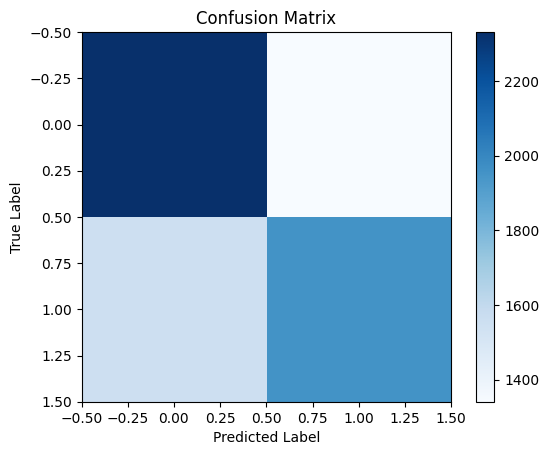

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from tqdm import tqdm
#simulation_winners = list()
#simulation_result_winners = list()
#simulation_result_round16 = list()
#simulation_wc_round16 = list()
#simulation_results_quaterfinal = list()
#simulation_wc_quaterfinal = list()
#simulation_results_semifinal = list()
#simulation_wc_semifinal = list()

#n_simulations = 1000

# Create an instance of the model
#model = RandomForestClassifier()

# Assuming X_train and y_train are your training data
#model.fit(X_train, y_train)  # Fit the model on the training data



#for j in tqdm(range(n_simulations)):
 # candidates = ['Argentina',  'Belgium', 'Brazil',
  #     'Denmark', 'Ecuador', 'England', 'France',
   #    'Germany',  'Morocco','Netherlands', 'Poland', 'Portugal', 'Senegal',
    #   'Spain', 'Switzerland', 'USA',]
  #finals = ['round_of_16', 'quaterfinal', 'semifinal', 'final']
  #for f in finals:
   # iterations = int(len(candidates)/2)

    #winners = []
    #prob = []




    #for i in range(iterations):
     # home = candidates[i*2]
      #away = candidates[i*2+1]


      #row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=['rank_avg', 'rank_diff', 'point_diff'])

      #row = pd.DataFrame(np.array([[np.nan, np.nan,True]]), columns = X_test.columns)




      #home_rank = team_ranking_home.loc[home, 'home_team_fifa_rank']
      #home_points = team_ranking_home.loc[home, 'home_team_total_fifa_points']

      #away_rank = team_ranking_away.loc[away, 'away_team_fifa_rank']
      #away_points = team_ranking_away.loc[away, 'away_team_total_fifa_points']

      #row['rank_avg'] = (home_rank + away_rank) /2
      #row['rank_diff'] = home_rank - away_rank
      #row['point_diff'] = home_points - away_points
      #row['score_diff'] = wc['home_team_score'] - wc['away_team_score']


      #home_win_prob = model.predict_proba(row)[:, 1][0]


      #home_win_prob = model.predict_proba(row[['rank_avg']])[:, 1][0]
      #rank_diff_home_win_prob = model.predict_proba(row[['rank_diff']])[:, 1][0]
      #point_diff_home_win_prob = model.predict_proba(row[['point_diff']])[:, 1][0]

 #     simulated_outcome = np.random.binomial(1, home_win_prob)
#
  #    winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
   #   prob.append(1-simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)


    #if f == 'round_of_16':
     # step_16 = ['round_16'] * 8
      #candidates_round_16 = zip(step_16, winners, prob)
      #wc_candidates_round_16 = pd.DataFrames(candidates_round_16, columns = ['step', 'team', 'prob'])
      #simulation_wc_round16.append(wc_candidates_round_16)
      #simulation_result_round16.append(winners)


    #if f == 'quaterfinal':
     # step_quaterfinal = ['quaterfinal'] * 4
      #candidates_quaterfinal = zip(step_quaterfinal, winners, prob)
      #wc_candidates_quaterfinal = pd.DataFrames(candidates_quaterfinal, columns = ['step', 'team', 'prob'])
      #simulation_wc_quaterfinal.append(wc_candidates_quaterfinal)
      #simulation_results_quaterfinal.append(winners)


    #if f == 'semifinal':
     # step_semifinal = ['semifinal'] * 2
      #candidates_semifinal = zip(step_semifinal, winners, prob)
      #wc_candidates_semifinal = pd.DataFrames(candidates_semifinal, columns = ['step', 'team', 'prob'])
      #simulation_wc_semifinal.append(wc_candidates_semifinal)
      #simulation_results_semifinal.append(winners)


    #if f == 'final':
     # step_final = ['final'] * 1
      #candidates_final = zip(step_final, winners, prob)
      #wc_candidates_final = pd.DataFrames(candidates_final, columns = ['step', 'team', 'prob'])
      #simulation_winners.append(wc_candidates_final)
      #simulation_result_winners.append(winners)


      #candidates = winners

#wc_candidates_round_16 = pd.concat(simulation_wc_round16)
#wc_candidates_quaterfinal = pd.concat(simulation_wc_quaterfinal)
#wc_candidates_semifinal = pd.concat(simulation_wc_semifinal)
#wc_candidates_final = pd.concat(simulation_winners)

#wc_results = pd.concat([wc_candidates_round_16,wc_candidates_quaterfinal, wc_candidates_semifinal, wc_candidates_final])

#simulation_result_round16 =sum(simulation_result_round16,[])
#simulation_results_quaterfinal = sum(simulation_results_quaterfinal,[])
#simulation_results_semifinal = sum(simulation_results_semifinal, [])
#simulation_result_winners = sum(simulation_result_winners, [])


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from tqdm import tqdm

#simulation_winners = list()
#simulation_result_winners = list()
#simulation_result_round16 = list()
#simulation_wc_round16 = list()
#simulation_result_quarterfinal = list()
#simulation_wc_quarterfinal = list()
#simulation_result_semifinal = list()
#simulation_wc_semifinal = list()

#n_simulations = 1000

#for j in tqdm(range(n_simulations)):
 #   candidates = ['Argentina', 'Belgium', 'Brazil', 'Denmark', 'Ecuador', 'England', 'France',
  #                'Germany', 'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Senegal',
   #               'Spain', 'Switzerland', 'USA']
    #finals = ['round_of_16', 'quaterfinal', 'semifinal', 'final']
    #for f in finals:
     #   iterations = int(len(candidates) / 2)
      #  winners = []
       # prob = []

        #for i in range(iterations):
         #   home = candidates[i * 2]
          #  away = candidates[i * 2 + 1]
#
 #           row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=['rank_diff', 'rank_avg', 'point_diff'])

  #          home_rank = team_ranking_home.loc[home, 'home_team_fifa_rank']
   #         home_points = team_ranking_home.loc[home, 'home_team_total_fifa_points']
    #        away_rank = team_ranking_away.loc[away, 'away_team_fifa_rank']
     #       away_points = team_ranking_away.loc[away, 'away_team_total_fifa_points']

      #      row['rank_avg'] = (home_rank + away_rank) / 2
       #     row['rank_diff'] = home_rank - away_rank
        #    row['point_diff'] = home_points - away_points

            #home_win_prob = model.predict_proba(row)[:, 1]

         #   home_win_prob = model.predict_proba(row)[:, 1][0]
          #  simulated_outcome = np.random.binomial(1, home_win_prob)

           # winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            #prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)

        #if f == 'round_of_16':
         #   step_16 = ['round_16'] * 8
          #  candidates_round_16 = zip(step_16, winners, prob)
           # wc_candidates_round_16 = pd.DataFrame(candidates_round_16, columns=['step', 'team', 'prob'])
            #simulation_wc_round16.append(wc_candidates_round_16)
            #simulation_result_round16.append(winners)

        #if f == 'quarterfinal':
         #   step_quarterfinal = ['quarterfinal'] * 4
          #  candidates_quarterfinal = zip(step_quarterfinal, winners, prob)
           ## wc_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns=['step', 'team', 'prob'])
            #simulation_wc_quarterfinal.append(wc_candidates_quarterfinal)
            #simulation_result_quarterfinal.append(winners)


        #if f == 'semifinal':
         #   step_semifinal = ['semifinal'] * 2
          #  candidates_semifinal = zip(step_semifinal, winners, prob)
           ## wc_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['step', 'team', 'prob'])
            #simulation_wc_semifinal.append(wc_candidates_semifinal)
            #simulation_result_semifinal.append(winners)


#    if f == 'final':
 #     step_final = ['final'] * 1
  #    candidates_final = zip(step_final, winners, prob)
   #   wc_candidates_final = pd.DataFrame(candidates_final, columns = ['step', 'team', 'prob'])
    #  simulation_winners.append(wc_candidates_final)
     # simulation_result_winners.append(winners)


      #candidates = winners


#wc_candidates_round_16 = pd.concat(simulation_wc_round16)
#wc_candidates_quarterfinal = pd.concat(simulation_wc_quarterfinal)
#wc_candidates_semifinal = pd.concat(simulation_wc_semifinal)
#wc_candidates_final = pd.concat(simulation_winners)

#wc_results = pd.concat([wc_candidates_round_16, wc_candidates_quarterfinal, wc_candidates_semifinal, wc_candidates_final])

#wc_candidates_round_16 = pd.concat(simulation_wc_round16)
#wc_candidates_quarterfinal = pd.concat(simulation_wc_quarterfinal)
#wc_candidates_semifinal = pd.concat(simulation_wc_semifinal)
#wc_candidates_final = pd.concat(simulation_winners)

#wc_results = pd.concat([wc_candidates_round_16,wc_candidates_quarterfinal, wc_candidates_semifinal, wc_candidates_final])

#simulation_result_round16 =sum(simulation_result_round16,[])
#simulation_result_quaterfinal = sum(simulation_result_quarterfinal,[])
#simulation_result_semifinal = sum(simulation_result_semifinal, [])
#simulation_result_winners = sum(simulation_result_winners, [])



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

simulation_winners = list()
simulation_result_winners = list()
simulation_result_round16 = list()
simulation_wc_round16 = list()
simulation_result_quarterfinal = list()
simulation_wc_quarterfinal = list()
simulation_result_semifinal = list()
simulation_wc_semifinal = list()

n_simulations = 1000

for j in tqdm(range(n_simulations)):
    candidates = ['Argentina', 'Belgium', 'Brazil', 'Denmark', 'Ecuador', 'England', 'France',
                  'Germany', 'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Senegal',
                  'Spain', 'Switzerland', 'USA']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []
        prob = []

        for i in range(iterations):
            home = candidates[i * 2]
            away = candidates[i * 2 + 1]

            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=['rank_diff', 'rank_avg', 'point_diff'])

            home_rank = team_ranking_home.loc[home, 'home_team_fifa_rank']
            home_points = team_ranking_home.loc[home, 'home_team_total_fifa_points']
            away_rank = team_ranking_away.loc[away, 'away_team_fifa_rank']
            away_points = team_ranking_away.loc[away, 'away_team_total_fifa_points']

            row['rank_avg'] = (home_rank + away_rank) / 2
            row['rank_diff'] = home_rank - away_rank
            row['point_diff'] = home_points - away_points

            home_win_prob = model.predict_proba(row)[:, 1][0]
            simulated_outcome = np.random.binomial(1, home_win_prob)

            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)

        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = list(zip(step_16, winners, prob))
            wc_candidates_round_16 = pd.DataFrame(candidates_round_16, columns=['step', 'team', 'prob'])
            simulation_wc_round16.append(wc_candidates_round_16)
            simulation_result_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = list(zip(step_quarterfinal, winners, prob))
            wc_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns=['step', 'team', 'prob'])
            simulation_wc_quarterfinal.append(wc_candidates_quarterfinal)
            simulation_result_quarterfinal.append(winners)

        if f == 'semifinal':
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = list(zip(step_semifinal, winners, prob))
            wc_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns=['step', 'team', 'prob'])
            simulation_wc_semifinal.append(wc_candidates_semifinal)
            simulation_result_semifinal.append(winners)

        if f == 'final':
            step_final = ['final'] * 1
            candidates_final = list(zip(step_final, winners, prob))
            wc_candidates_final = pd.DataFrame(candidates_final, columns=['step', 'team', 'prob'])
            simulation_winners.append(wc_candidates_final)
            simulation_result_winners.append(winners)


    candidates = winners

wc_candidates_round_16 = pd.concat(simulation_wc_round16)
wc_candidates_quarterfinal = pd.concat(simulation_wc_quarterfinal)
wc_candidates_semifinal = pd.concat(simulation_wc_semifinal)
wc_candidates_final = pd.concat(simulation_winners)

wc_results = pd.concat([wc_candidates_round_16, wc_candidates_quarterfinal, wc_candidates_semifinal, wc_candidates_final])

simulation_result_round16 = sum(simulation_result_round16, [])
simulation_result_quarterfinal = sum(simulation_result_quarterfinal, [])
simulation_result_semifinal = sum(simulation_result_semifinal, [])
simulation_result_winners = sum(simulation_result_winners, [])

100%|██████████| 1000/1000 [01:28<00:00, 11.35it/s]


In [ ]:
from collections import Counter

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
#(first_result = [simulation_result_round16], simulation_results_quarterfinal, simulation_results_semifinal, simulation_result_winners
#for i in first_result:
    #results = Counter(tuple(i)).most_common()
 #   results = Counter(i).most_common()
  #  x,y = zip(*result)
   # fig,ax = plt.subplots(figsize=(15,6))

    #ax.barh(x,y)

    #ax.set_ylabel('TEAM')

    #if i == simulation_result_round16:
     # ax.set_title('Round16 World Cup')
    #if i == simulation_results_quarterfinal:
     # ax.set_title('World cup QaurterFinal')
    #if i == simulation_results_semifinal:
     # ax.set_title('World cup SemiFinal')
    #if i == simulation_result_winners:
     # ax.set_title('World cup Finals')

      #plt.show)

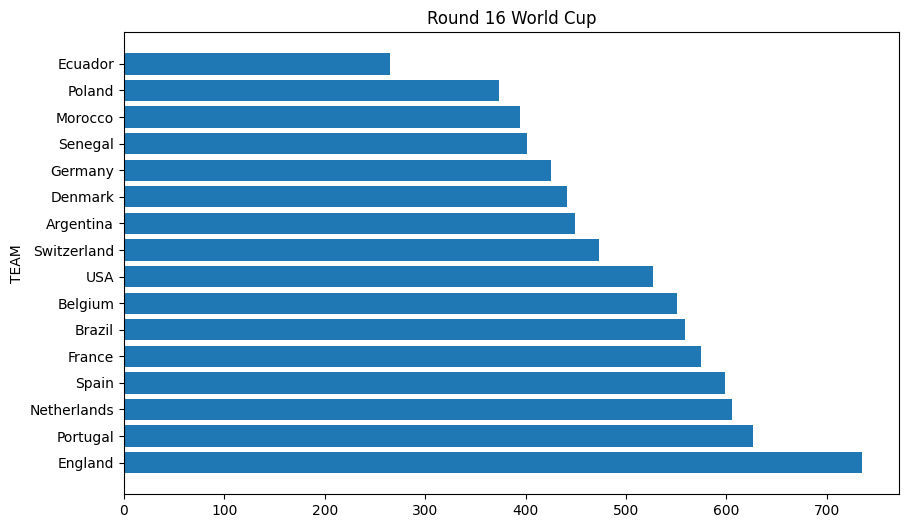

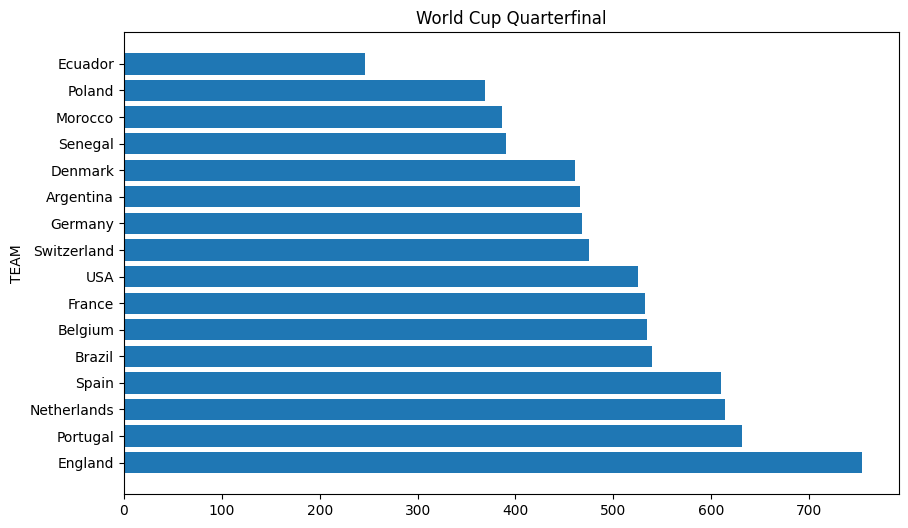

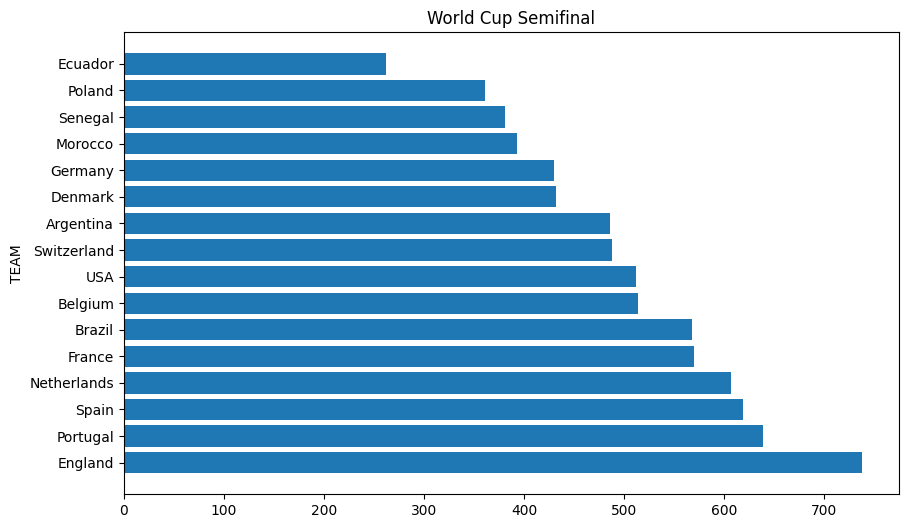

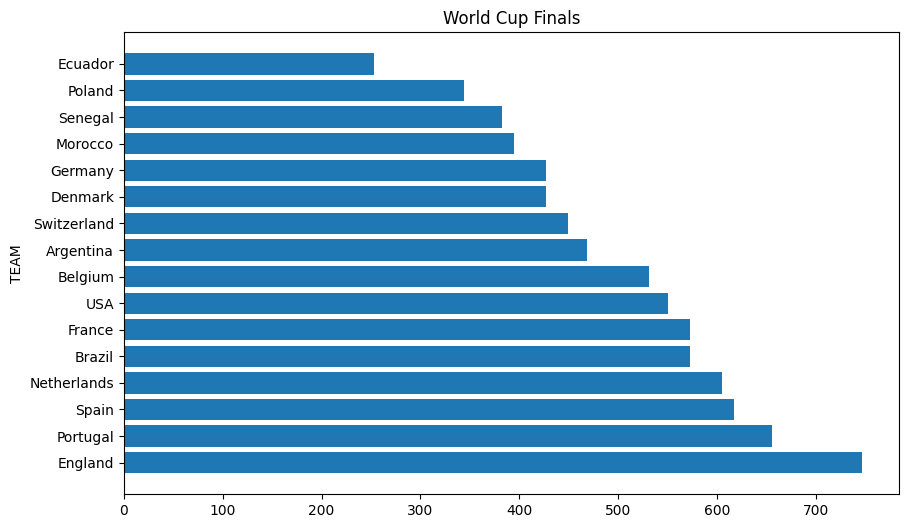

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

first_result = [simulation_result_round16, simulation_result_quarterfinal, simulation_result_semifinal, simulation_result_winners]

for i in first_result:
    result = Counter(i).most_common()


    X,y = zip(*result)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(X, y)

    ax.set_ylabel('TEAM')

    if i == simulation_result_round16:
        ax.set_title('Round 16 World Cup')
    elif i == simulation_result_quarterfinal:
        ax.set_title('World Cup Quarterfinal')
    elif i == simulation_result_semifinal:
        ax.set_title('World Cup Semifinal')
    elif i == simulation_result_winners:
        ax.set_title('World Cup Finals')

    plt.show()

In [ ]:
import random

team_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

team_colors = {}

for team in team_2022:
    # Generate random RGB values for the team color
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)

    # Store the RGB values as a tuple in the team_colors dictionary
    team_colors[team] = (r, g, b)

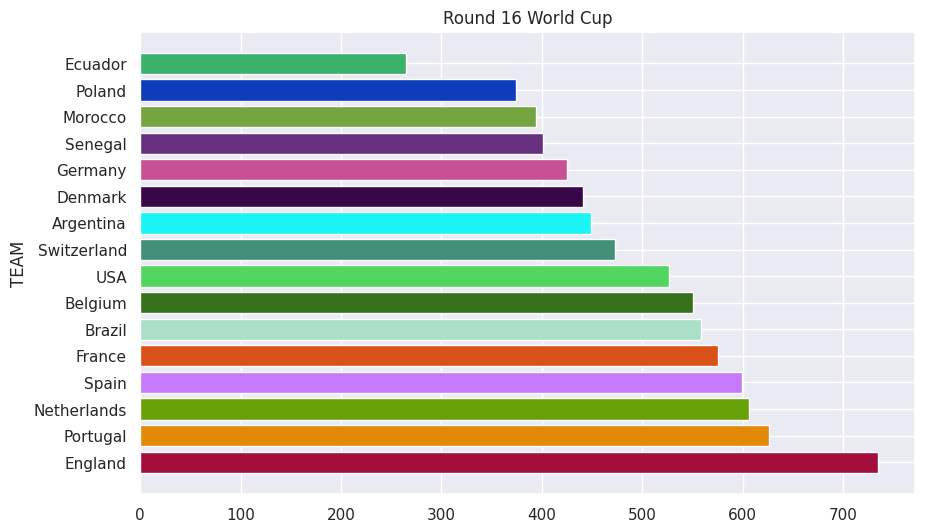

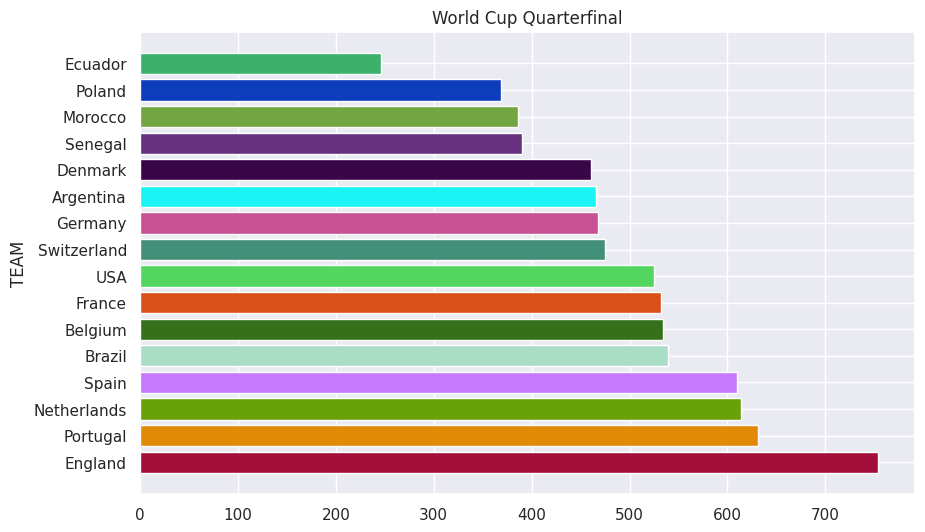

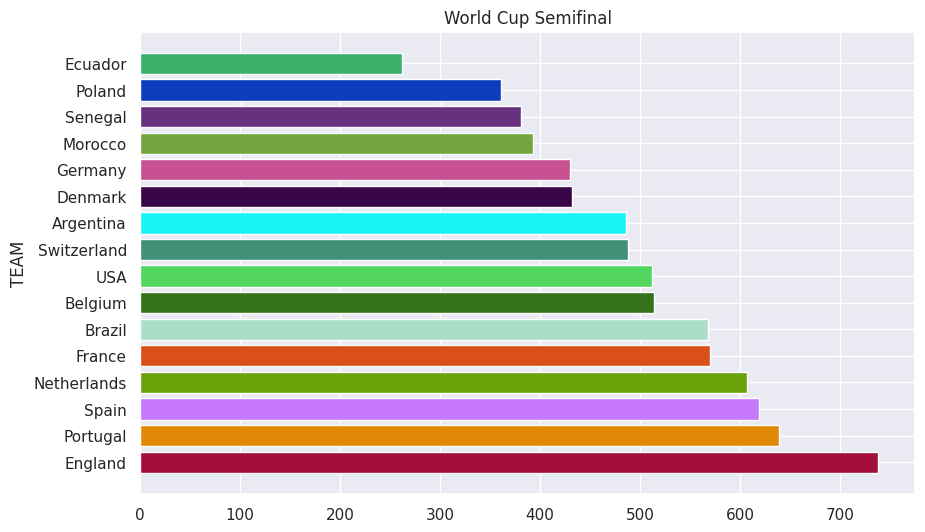

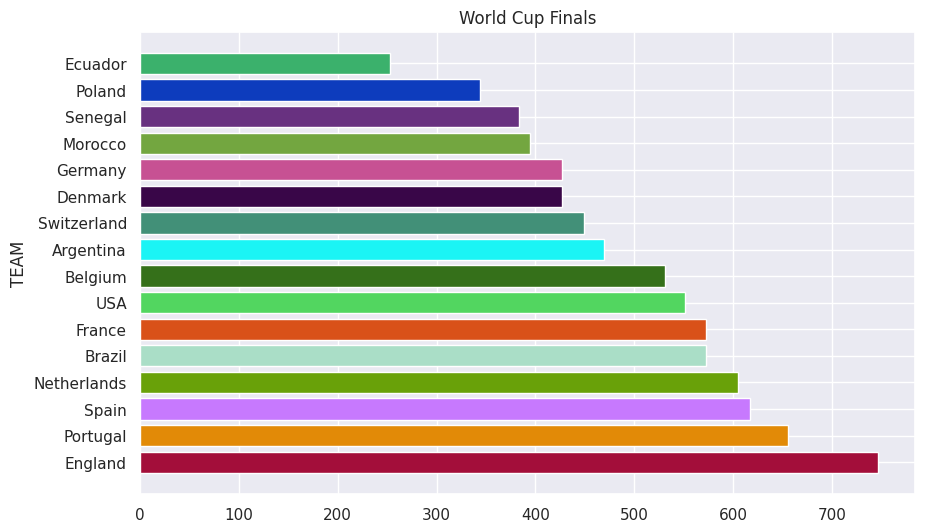

In [ ]:
import matplotlib.pyplot as plt
import random
from collections import Counter

team_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']


team_colors = {}


for team in team_2022:
    r = random.uniform(0, 1)
    g = random.uniform(0, 1)
    b = random.uniform(0, 1)
    team_colors[team] = (r, g, b)

first_result = [simulation_result_round16, simulation_result_quarterfinal, simulation_result_semifinal, simulation_result_winners]

for i, result in enumerate(first_result):
    result_count = Counter(result).most_common()

    X, y = zip(*result_count)
    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(range(len(X)), y, color=[team_colors[team] for team in X])
    ax.set_yticks(range(len(X)))
    ax.set_yticklabels(X)


    for j, bar in enumerate(bars):
        bar.set_height(0.8)

    ax.set_ylabel('TEAM')

    if i == 0:
        ax.set_title('Round 16 World Cup')
    elif i == 1:
        ax.set_title('World Cup Quarterfinal')
    elif i == 2:
        ax.set_title('World Cup Semifinal')
    elif i == 3:
        ax.set_title('World Cup Finals')

    plt.show()

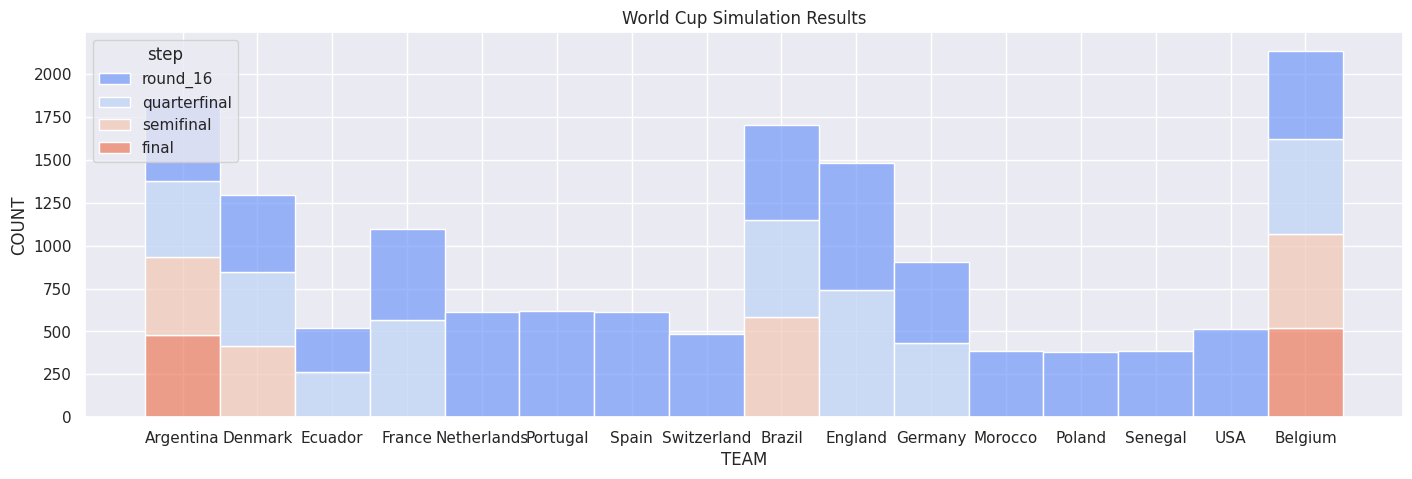

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(17, 5))
g = sns.histplot(data=wc_results, x='team', hue='step', multiple='stack', palette='coolwarm')
g.set_xlabel('TEAM')
g.set_ylabel('COUNT')
g.set_title('World Cup Simulation Results')


# Position the hue legend in the center
#legend = plt.legend(title='Step')
#legend.set_bbox_to_anchor((0.5, -0.15))
#legend.get_title().set_fontsize('12')

plt.show()


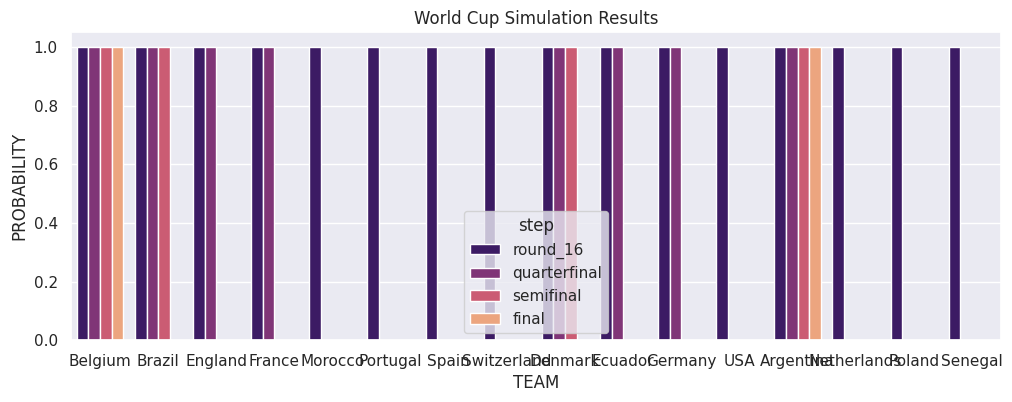

In [ ]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(12, 4))
g = sns.barplot(data=wc_results, x='team', y='prob', hue='step', palette='magma')
g.set_xlabel('TEAM')
g.set_ylabel('PROBABILITY')
g.set_title('World Cup Simulation Results')

plt.show()

USING RANDOMFOREST CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [ ]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predicted_winners = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predicted_winners)
print("Accuracy:", accuracy)


Accuracy: 0.6265849240629789


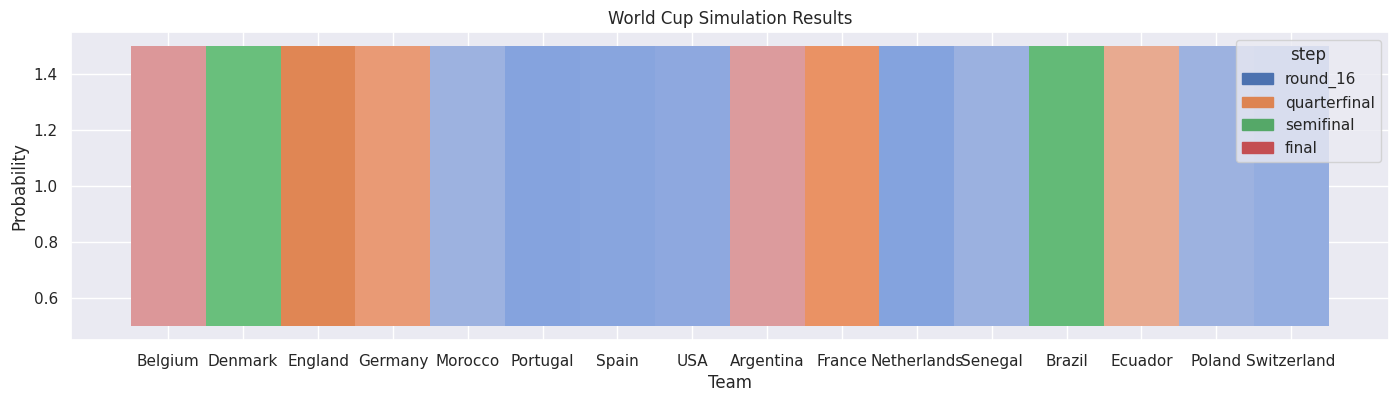

In [ ]:
rf_predicted_probs = model.predict_proba(row)[:, 1]
home_win_prob = rf_predicted_probs[0]

simulated_outcome = np.random.binomial(1, home_win_prob)

winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)

if f == 'round_of_16':
    step_16 = ['round_16'] * 8
    candidates_round_16 = list(zip(step_16, winners, prob))
    wc_candidates_round_16 = pd.DataFrame(candidates_round_16, columns=['step', 'team', 'prob'])
    simulation_wc_round16.append(wc_candidates_round_16)
    if simulation_result_round16 is None:
        simulation_result_round16 = []
    simulation_result_round16.extend(winners)

if f == 'quarterfinal':
    step_quarterfinal = ['quarterfinal'] * 4
    candidates_quarterfinal = list(zip(step_quarterfinal, winners, prob))
    wc_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns=['step', 'team', 'prob'])
    simulation_wc_quarterfinal.append(wc_candidates_quarterfinal)
    if simulation_result_quarterfinal is None:
        simulation_result_quarterfinal = []
    simulation_result_quarterfinal.extend(winners)

if f == 'semifinal':
    step_semifinal = ['semifinal'] * 2
    candidates_semifinal = list(zip(step_semifinal, winners, prob))
    wc_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns=['step', 'team', 'prob'])
    simulation_wc_semifinal.append(wc_candidates_semifinal)
    if simulation_result_semifinal is None:
        simulation_result_semifinal = []
    simulation_result_semifinal.extend(winners)

if f == 'final':
    step_final = ['final'] * 1
    candidates_final = list(zip(step_final, winners, prob))
    wc_candidates_final = pd.DataFrame(candidates_final, columns=['step', 'team', 'prob'])
    simulation_winners.append(wc_candidates_final)
    if simulation_result_winners is None:
        simulation_result_winners = []
    simulation_result_winners.extend(winners)

candidates = winners

wc_candidates_round_16 = pd.concat(simulation_wc_round16)
wc_candidates_quarterfinal = pd.concat(simulation_wc_quarterfinal)
wc_candidates_semifinal = pd.concat(simulation_wc_semifinal)
wc_candidates_final = pd.concat(simulation_winners)

wc_results = pd.concat([wc_candidates_round_16, wc_candidates_quarterfinal, wc_candidates_semifinal, wc_candidates_final])

simulation_result_round16 = []
simulation_result_quarterfinal = []
simulation_result_semifinal = []
simulation_result_winners = []

# Rest of your code...

simulation_result_round16.extend(winners)
simulation_result_quarterfinal.extend(winners)
simulation_result_semifinal.extend(winners)
simulation_result_winners.extend(winners)


sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(17, 4))
g = sns.histplot(data=wc_results, x='team', y='prob', hue='step', kde=True, stat="probability", multiple="fill")
g.set_xlabel('Team')
g.set_ylabel('Probability')
g.set_title('World Cup Simulation Results')

plt.show()



USING DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create an instance of DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the classifier on your training data
classifier.fit(X_train, y_train)

# Rest of your simulation code...

# Use the trained classifier to predict winners
rf_predicted_probs = classifier.predict_proba(row)[:, 1]
home_win_prob = rf_predicted_probs[0]

simulated_outcome = np.random.binomial(1, home_win_prob)

winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)

In [ ]:


if f == 'round_of_16':
    step_16 = ['round_16'] * 8
    candidates_round_16 = list(zip(step_16, winners, prob))
    wc_candidates_round_16 = pd.DataFrame(candidates_round_16, columns=['step', 'team', 'prob'])
    simulation_wc_round16.append(wc_candidates_round_16)
    if simulation_result_round16 is None:
        simulation_result_round16 = []
    simulation_result_round16.extend(winners)

if f == 'quarterfinal':
    step_quarterfinal = ['quarterfinal'] * 4
    candidates_quarterfinal = list(zip(step_quarterfinal, winners, prob))
    wc_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns=['step', 'team', 'prob'])
    simulation_wc_quarterfinal.append(wc_candidates_quarterfinal)
    if simulation_result_quarterfinal is None:
        simulation_result_quarterfinal = []
    simulation_result_quarterfinal.extend(winners)

if f == 'semifinal':
    step_semifinal = ['semifinal'] * 2
    candidates_semifinal = list(zip(step_semifinal, winners, prob))
    wc_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns=['step', 'team', 'prob'])
    simulation_wc_semifinal.append(wc_candidates_semifinal)
    if simulation_result_semifinal is None:
        simulation_result_semifinal = []
    simulation_result_semifinal.extend(winners)

if f == 'final':
    step_final = ['final'] * 1
    candidates_final = list(zip(step_final, winners, prob))
    wc_candidates_final = pd.DataFrame(candidates_final, columns=['step', 'team', 'prob'])
    simulation_winners.append(wc_candidates_final)
    if simulation_result_winners is None:
        simulation_result_winners = []
    simulation_result_winners.extend(winners)

candidates = winners

wc_candidates_round_16 = pd.concat(simulation_wc_round16)
wc_candidates_quarterfinal = pd.concat(simulation_wc_quarterfinal)
wc_candidates_semifinal = pd.concat(simulation_wc_semifinal)
wc_candidates_final = pd.concat(simulation_winners)

wc_results = pd.concat([wc_candidates_round_16, wc_candidates_quarterfinal, wc_candidates_semifinal, wc_candidates_final])

simulation_result_round16 = []
simulation_result_quarterfinal = []
simulation_result_semifinal = []
simulation_result_winners = []

# Rest of your code...

simulation_result_round16.extend(winners)
simulation_result_quarterfinal.extend(winners)
simulation_result_semifinal.extend(winners)
simulation_result_winners.extend(winners)


In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
#import matplotlib.pyplot as plt

# Create an instance of DecisionTreeClassifier
#classifier = DecisionTreeClassifier()

# Train the classifier on your training data
#classifier.fit(X_train, y_train)

# Plot the decision tree
#fig, ax = plt.subplots(figsize=(20, 7))
#tree.plot_tree(classifier, ax=ax)

# Show the plot
#plt.show()

In [ ]:
# Select relevant features and target variable
features = ['home_team_fifa_rank', 'away_team_fifa_rank',
            'home_team_total_fifa_points', 'away_team_total_fifa_points']
target = 'home_team_result'

# Split the data into training and testing sets
X = wc[features]
y = wc[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report)

Accuracy: 0.5134796238244514
Classification Report:
              precision    recall  f1-score   support

        Draw       0.29      0.22      0.25      1068
        Lose       0.46      0.47      0.47      1345
         Win       0.61      0.67      0.64      2372

    accuracy                           0.51      4785
   macro avg       0.45      0.45      0.45      4785
weighted avg       0.50      0.51      0.50      4785

